# **Data Science on Area and Population**

> This project come from:  
> https://amanxai.com/2020/05/09/data-science-project-on-area-and-population/

## Let's initialise and load the data !

In [1]:
# Initialisation
import pandas as pd
import seaborn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Loading data
cities = pd.read_csv("data/california_cities.csv")
cities.head()

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01


### Let's do some EDA:

In [3]:
cities.info()

<class 'pandas.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          482 non-null    int64  
 1   city                482 non-null    str    
 2   latd                482 non-null    float64
 3   longd               482 non-null    float64
 4   elevation_m         434 non-null    float64
 5   elevation_ft        470 non-null    float64
 6   population_total    482 non-null    int64  
 7   area_total_sq_mi    480 non-null    float64
 8   area_land_sq_mi     482 non-null    float64
 9   area_water_sq_mi    481 non-null    float64
 10  area_total_km2      477 non-null    float64
 11  area_land_km2       478 non-null    float64
 12  area_water_km2      478 non-null    float64
 13  area_water_percent  477 non-null    float64
dtypes: float64(11), int64(2), str(1)
memory usage: 52.8 KB


In [4]:
cities.describe()

,Unnamed: 0,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
count,482.000000,482.000000,482.000000,434.000000,470.000000,4.820000e+02,480.000000,482.000000,481.000000,477.000000,478.000000,478.000000,477.000000
mean,240.500000,36.095088,-119.837714,180.416705,567.168723,6.489493e+04,18.442183,16.840981,1.589630,46.753283,43.547021,3.125178,5.301801
std,139.285678,2.298006,2.147676,309.531825,1001.265722,2.032041e+05,36.363230,32.694647,9.490386,90.972269,84.933022,11.562269,14.656428
min,0.000000,32.578333,-124.263333,-34.000000,-180.000000,1.000000e+00,0.314000,0.314000,0.000000,0.813000,0.813000,0.000000,0.000000
25%,120.250000,33.977292,-121.954931,22.000000,69.000000,1.090200e+04,3.708250,3.506500,0.000000,9.551000,9.025000,0.000250,0.000000
50%,240.500000,36.204722,-119.708611,67.000000,200.000000,2.905750e+04,9.093000,8.362000,0.029000,23.551000,21.533000,0.078500,0.340000
75%,360.750000,37.886667,-117.977292,173.500000,515.000000,6.646650e+04,19.878250,19.090000,0.244000,51.772000,49.322000,0.623250,1.870000
max,481.000000,41.965000,-114.596389,2402.000000,7880.000000,3.884307e+06,503.000000,469.000000,185.020000,1302.000000,1214.000000,122.270000,84.580000


In [5]:
cities.isna().sum()

Unnamed: 0             0
city                   0
latd                   0
longd                  0
elevation_m           48
elevation_ft          12
population_total       0
area_total_sq_mi       2
area_land_sq_mi        0
area_water_sq_mi       1
area_total_km2         5
area_land_km2          4
area_water_km2         4
area_water_percent     5
dtype: int64

### In fact, in this project we are interested only by 4 data: **latitude**, **longitude**, **area** and **population**.

In [6]:
# Let's recover the data into variables
latitude, longitude = cities['latd'], cities['longd']
area, population = cities['area_total_km2'], cities['population_total']

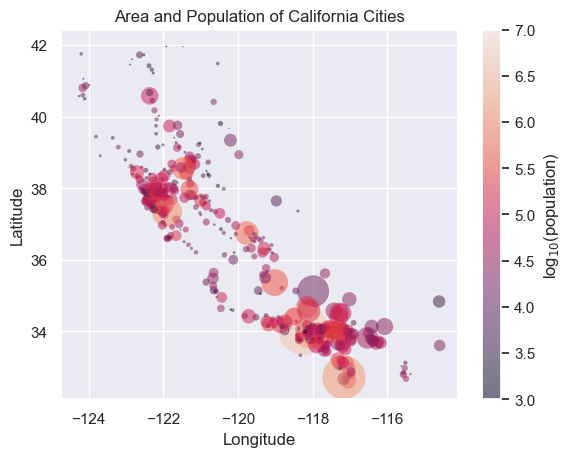

In [7]:
seaborn.set()
plt.scatter(longitude, latitude, label=None, c=np.log10(population), cmap='rocket', s=area, linewidth=0, alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title("Area and Population of California Cities")
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)

#### Let's create and add a legend:

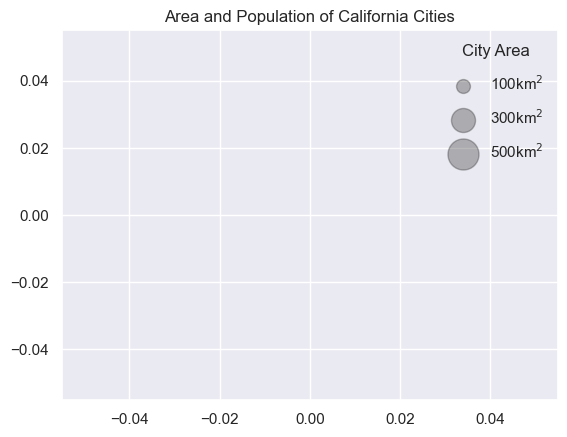

In [8]:
for areas in [100, 300, 500]:
    plt.scatter([],[], c='k', alpha=0.3, s=areas, label=str(areas)+'km$^2$')

plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Area')
plt.title("Area and Population of California Cities")
plt.show()

#### Let's merge everything:

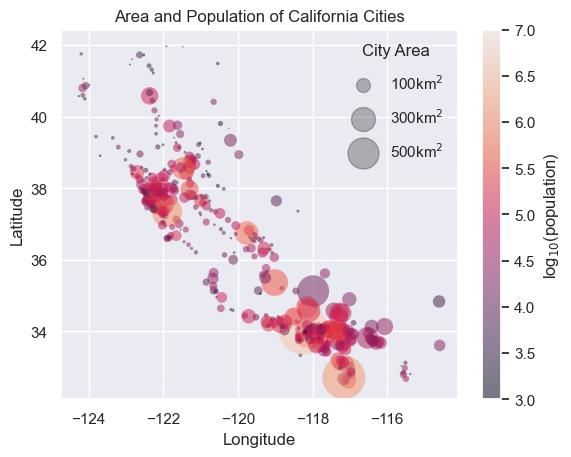

In [9]:
plt.scatter(longitude, latitude, label=None, c=np.log10(population), cmap='rocket', s=area, linewidth=0, alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title("Area and Population of California Cities")
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)

for areas in [100, 300, 500]:
    plt.scatter([],[], c='k', alpha=0.3, s=areas, label=str(areas)+'km$^2$')

plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Area')
plt.title("Area and Population of California Cities")
plt.savefig("Output.png", dpi=300, bbox_inches='tight')